<a href="https://colab.research.google.com/github/ELHADRINOUHAYLA/MNISTARABIC/blob/main/ML_MNIST_ARABIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classifient le base de donnée MNIST** 

## importer des bibliothèques

In [ ]:
!unzip data.zip 

Streaming output truncated to the last 5000 lines.
  inflating: data/ghain_middle/21.png  
  inflating: data/ghain_middle/22.png  
  inflating: data/ghain_middle/23.png  
  inflating: data/ghain_middle/24.png  
  inflating: data/ghain_middle/25.png  
  inflating: data/ghain_middle/26.png  
  inflating: data/ghain_middle/27.png  
  inflating: data/ghain_middle/3.png  
  inflating: data/ghain_middle/4.png  
  inflating: data/ghain_middle/5.png  
  inflating: data/ghain_middle/6.png  
  inflating: data/ghain_middle/7.png  
  inflating: data/ghain_middle/8.png  
  inflating: data/ghain_middle/9.png  
   creating: data/hae_start/
  inflating: data/hae_start/1.png    
  inflating: data/hae_start/10.png   
  inflating: data/hae_start/100.jpg  
  inflating: data/hae_start/101.jpg  
  inflating: data/hae_start/102.jpg  
  inflating: data/hae_start/103.jpg  
  inflating: data/hae_start/104.jpg  
  inflating: data/hae_start/105.jpg  
  inflating: data/hae_start/106.png  
  inflating: data/hae_sta

In [ ]:
import csv
import os
from PIL import Image

# Initialize an empty list to store the pixel values and labels
data = []

# Loop through all the folders in the dataset
for folder in os.listdir('data'):
    # Loop through all the files in the folder
    for file in os.listdir(os.path.join('data', folder)):
        # Open the image file
        with Image.open(os.path.join('data', folder, file)) as img:
            # Get the pixel values as a list
            pixels = list(img.getdata())
            # Convert the pixel values to strings
            pixels = [str(x) for x in pixels]
            # Add the pixel values and label to the data list
            data.append((folder, pixels))

# Open the CSV file for writing
with open('image2pixels.csv', 'w', newline='') as csvfile:
    # Create a writer object
    writer = csv.writer(csvfile)
    
    # Write the column names
    writer.writerow(['label'] + ['pixel_{}'.format(i) for i in range(len(pixels))])
    
    # Write the rows
    for row in data:
        # Convert the label to a string
        label = str(row[0])
        # Write the row to the CSV file
        writer.writerow([label] + row[1])


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',50)
warnings.filterwarnings('ignore')

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import binarize, Binarizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

In [ ]:
import csv
import random

# Set the input and output file paths
input_file = 'mnist-arabic.csv'
train_file = 'train.csv'
test_file = 'test.csv'

# Set the proportion of the data to use for training
train_proportion = 0.8

# Read the data from the input file
data = []
header = None
with open(input_file, 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0:
            # Save the header row
            header = row
        else:
            data.append(row)

# Calculate the number of rows to use for training and testing
num_train = int(train_proportion * len(data))
num_test = len(data) - num_train

# Randomly select the rows for training and testing
random.shuffle(data)
train_data = data[:num_train]
test_data = data[num_train:]

# Write the training data to the output file
with open(train_file, 'w') as f:
    writer = csv.writer(f)
    if header:
        writer.writerow(header)
    for row in train_data:
        writer.writerow(row)

# Write the test data to the output file
with open(test_file, 'w') as f:
    writer = csv.writer(f)
    if header:
        writer.writerow(header)
    for row in test_data:
        writer.writerow(row)

## chargement des données

In [ ]:
#char_data = pd.read_csv('train.csv', on_bad_lines='skip')
#char_test = pd.read_csv('test.csv', on_bad_lines='skip')

In [ ]:
arabic = pd.read_csv('data2pixels.csv')
arabic

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,...,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,ain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387,zae_end,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7388,zae_end,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7389,zae_end,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7390,zae_end,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Il est difficile de voir la description de toutes les colonnes, mais vérifions au moins s’il y a des valeurs nulles

In [ ]:
arabic.columns[arabic.isna().sum()>0]

Index([], dtype='object')

In [ ]:
char_data.columns[char_data.isna().sum()>0]
char_test.columns[char_test.isna().sum()>0]

NameError: ignored

In [ ]:
# Drop rows with null values
char_data = char_data.dropna()
char_test = char_test.dropna()

In [ ]:
char_data.columns[char_data.isna().sum()>0]
char_test.columns[char_test.isna().sum()>0]

Index([], dtype='object')

Bon, il n’y a pas de valeurs manquantes (comme prévu)

Vérifions la distribution des données d’étiquettes

In [ ]:
print(arabic['label'].value_counts().sort_index())

ain                  22
ain_end              27
ain_middle           81
ain_start           104
alif                773
alif_end            622
alif_maqsora         22
bae_end              56
bae_middle           68
bae_start           184
dad_start            44
dal                 137
dal_end             184
fa_end               27
fa_middle            45
fa_start             27
ghain_middle         27
hae_start           165
hamza               179
hhae_middle         177
hhae_start          104
jeem                 27
jeem_start           76
kaf_middle          107
kaf_start            61
khae_middle          27
khae_start           48
lam_alif             23
lam_end              55
lam_middle           65
lam_start           415
mim                  92
mim_middle          288
mim_start           151
noun                116
noun_end             95
noun_middle         125
noun_start          126
qua_middle           26
rae                 140
rae_end             125
sad_start       

In [ ]:
print(char_data['label'].value_counts().sort_index())

ain                  19
ain_end              23
ain_middle           66
ain_start            81
alif                617
alif_end            509
alif_maqsora         19
bae_end              48
bae_middle           51
bae_start           151
dad_start            38
dal                 102
dal_end             150
fa_end               24
fa_middle            37
fa_start             20
ghain_middle         20
hae_start           133
hamza               142
hhae_middle         135
hhae_start           89
jeem                 21
jeem_start           54
kaf_middle           89
kaf_start            53
khae_middle          22
khae_start           37
lam_alif             15
lam_end              50
lam_middle           55
lam_start           333
mim                  71
mim_middle          237
mim_start           130
noun                 89
noun_end             75
noun_middle         106
noun_start          106
qua_middle           18
rae                 108
rae_end              95
sad_start       

Il semble normal, presque équilibré, et chaque étiquette a suffisamment de données

## Visualiser certains chiffres aléatoires

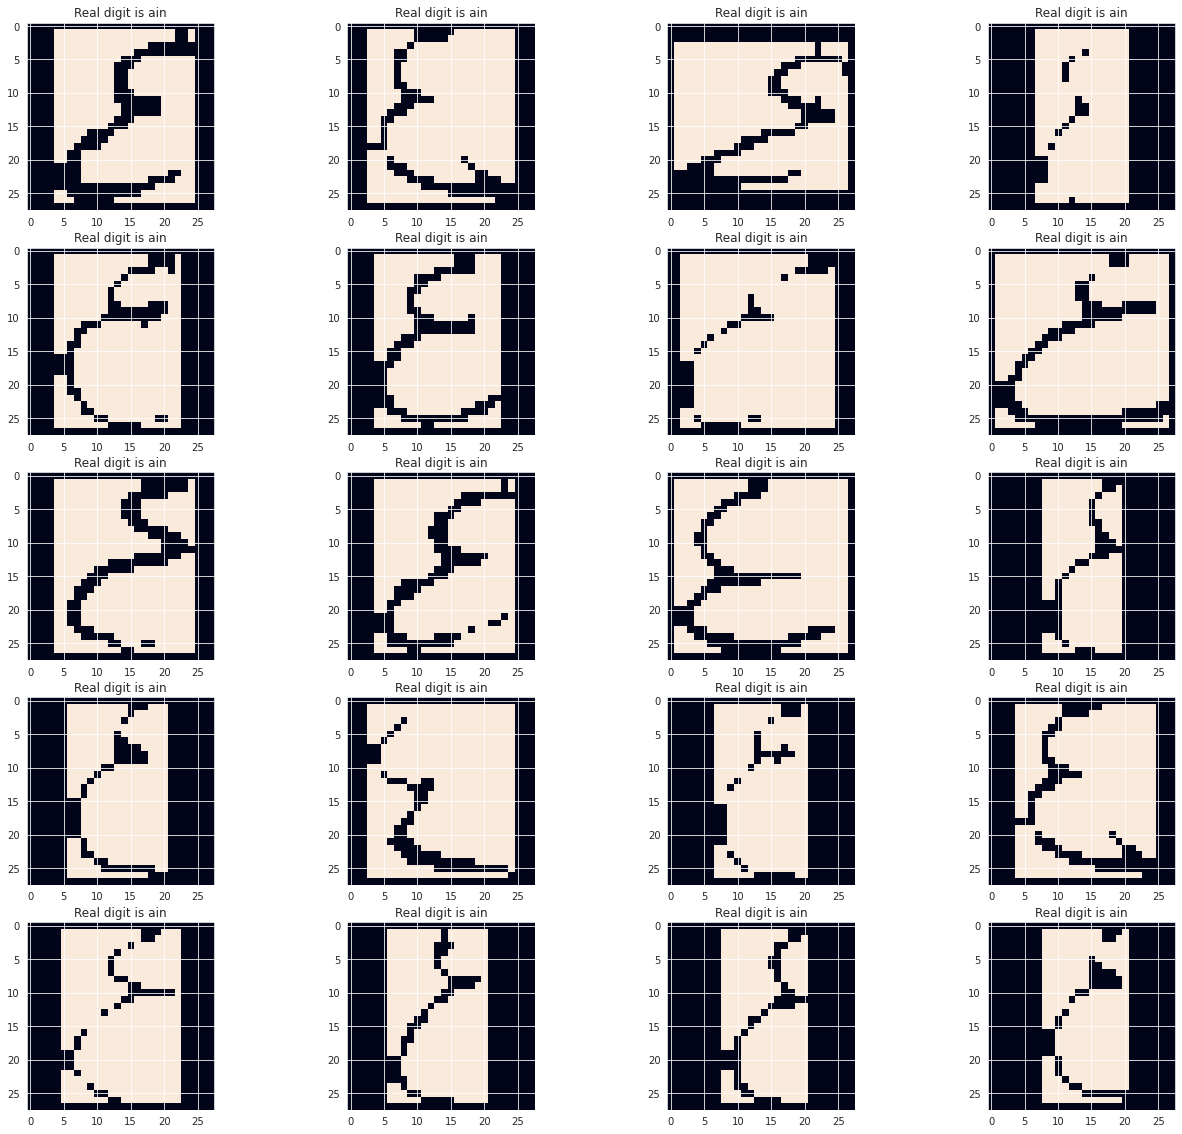

In [ ]:
# afficher 25 digits dans le jeux de données
fig, axis = plt.subplots(5, 4, figsize=(22, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(np.array(arabic.iloc[i,1:], dtype = float).reshape(28,28))
    ax.set(title = "Real digit is {}".format(arabic['label'].loc[i]))

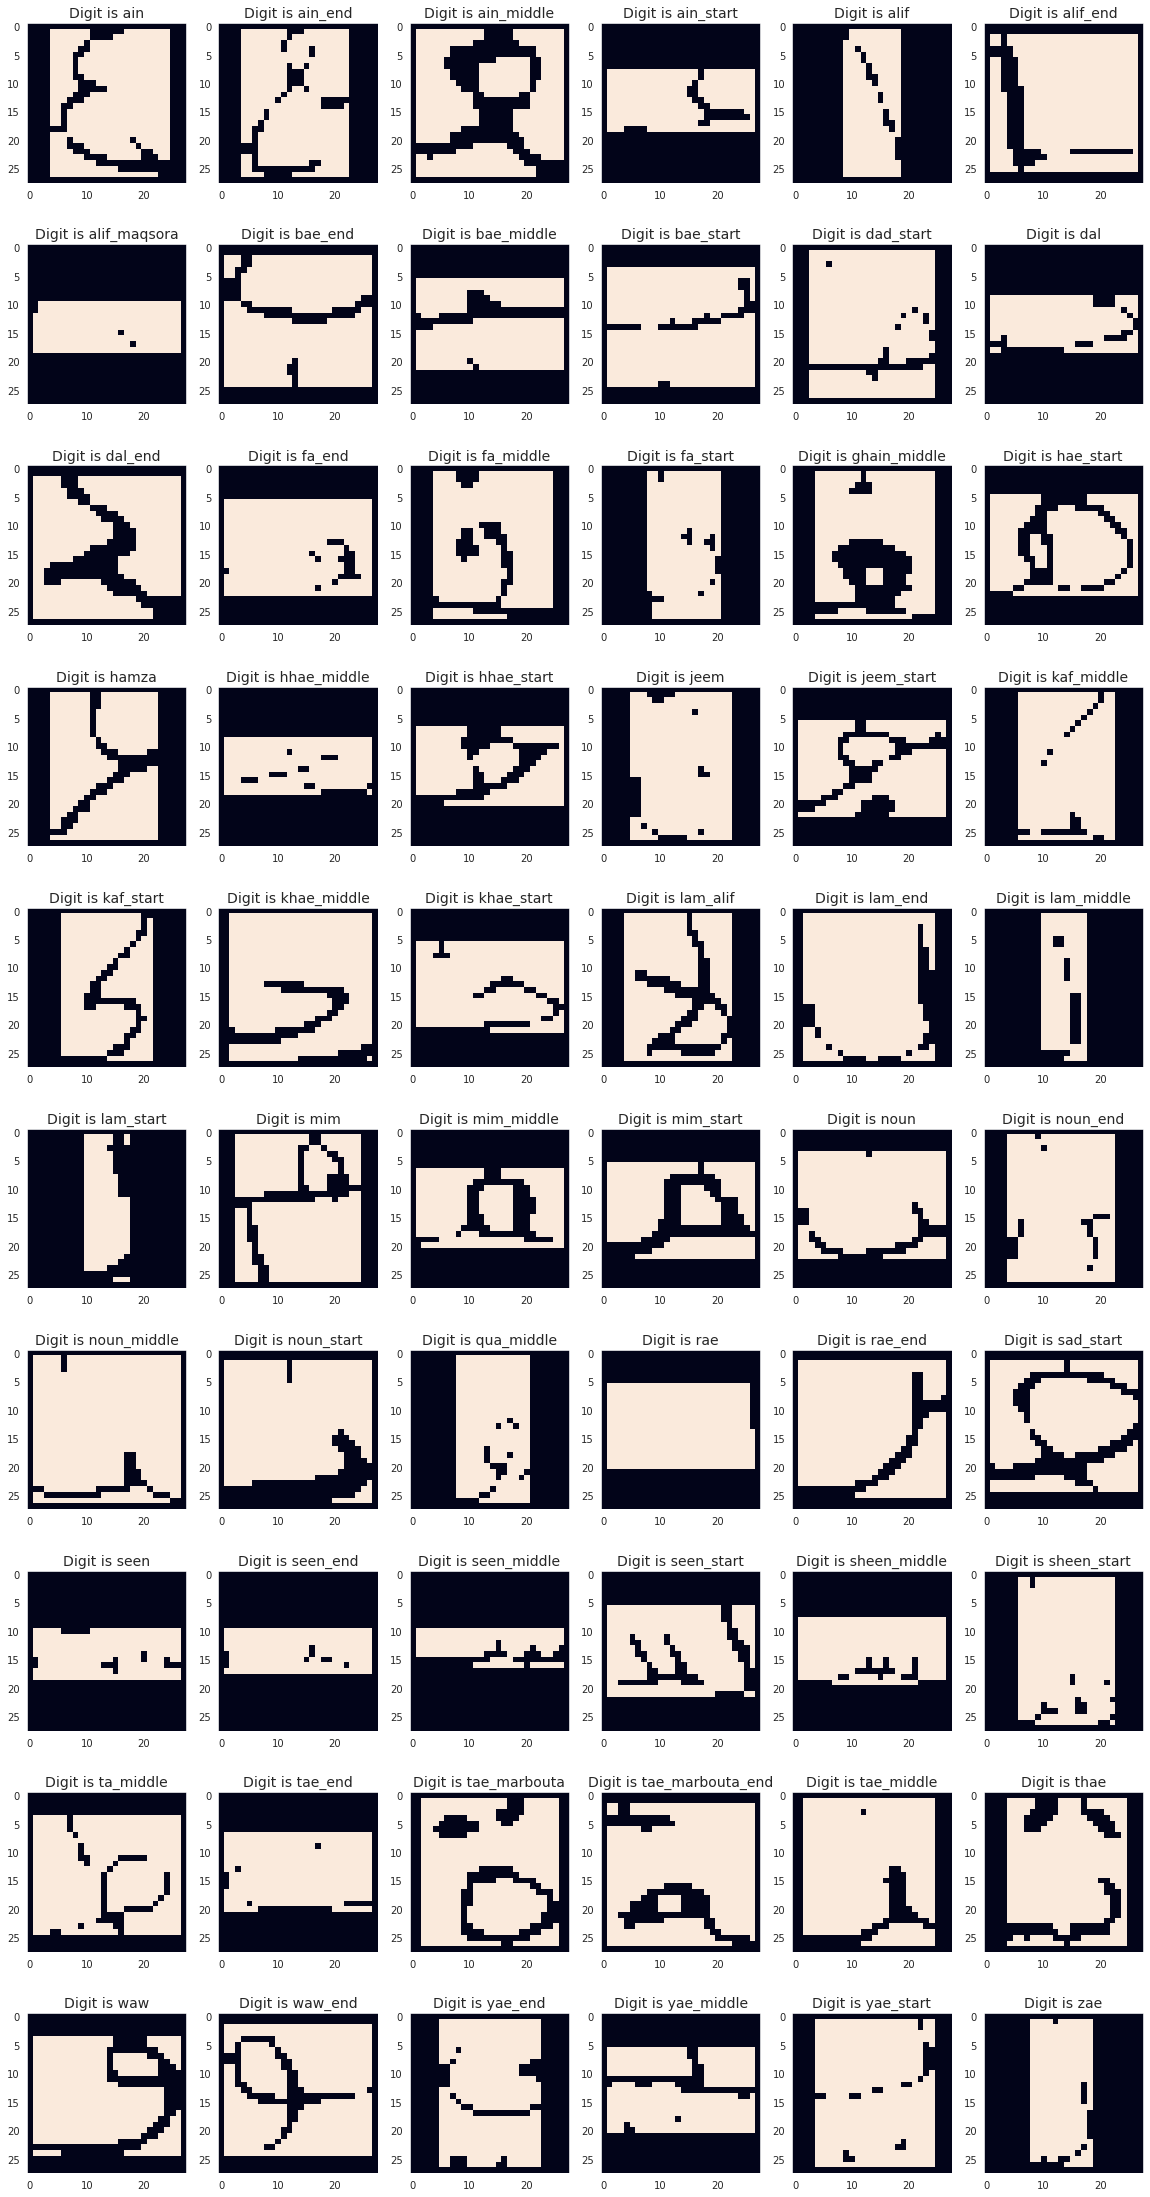

In [ ]:
fig, axes = plt.subplots(nrows=10,ncols=6, figsize=(20,40),sharey=True, sharex=True)
idx = 0
names = ['ain', 'ain_end', 'ain_middle', 'ain_start', 'alif', 'alif_end', 'alif_maqsora', 'bae_end', 'bae_middle', 'bae_start', 'dad_start', 'dal', 'dal_end', 'fa_end', 'fa_middle', 'fa_start', 'ghain_middle', 'hae_start', 'hamza', 'hhae_middle', 'hhae_start', 'jeem', 'jeem_start', 'kaf_middle', 'kaf_start', 'khae_middle', 'khae_start', 'lam_alif', 'lam_end', 'lam_middle', 'lam_start', 'mim', 'mim_middle', 'mim_start', 'noun', 'noun_end', 'noun_middle', 'noun_start', 'qua_middle', 'rae', 'rae_end', 'sad_start', 'seen', 'seen_end', 'seen_middle', 'seen_start', 'sheen_middle', 'sheen_start', 'ta_middle', 'tae_end', 'tae_marbouta', 'tae_marbouta_end', 'tae_middle', 'thae', 'waw', 'waw_end', 'yae_end', 'yae_middle', 'yae_start', 'zae', 'zae_end']
idx = 0
for i in range(60):
    j = arabic[arabic.label==names[i % len(names)]].sample(n=1).index[0]
    digit = arabic['label'].loc[j]
    idx+=1
    plt.subplot(10,6,idx)
    plt.imshow(np.array(arabic.iloc[j,1:], dtype = float).reshape(28,28))
    plt.title(f'Digit is {digit}',fontsize=14)
    plt.grid(None)

Il semble y avoir du bruit autour des nombres. Vérifions les valeurs de quel composant le dessin à la main

In [ ]:
for k in names:
    temp_freq = pd.Series(arabic.iloc[:,1:].sample(1).T.value_counts(), name='freq')
    print(temp_freq[temp_freq>3])
    print('='*30)

2095
255     421
0       363
Name: freq, dtype: int64
3193
255     485
0       299
Name: freq, dtype: int64
3836
0       521
255     263
Name: freq, dtype: int64
1578
0       506
255     278
Name: freq, dtype: int64
3685
255     498
0       286
Name: freq, dtype: int64
4542
0       455
255     329
Name: freq, dtype: int64
2429
255     424
0       360
Name: freq, dtype: int64
4179
0       546
255     238
Name: freq, dtype: int64
6926
255     573
0       211
Name: freq, dtype: int64
35 
255    505
0      279
Name: freq, dtype: int64
6166
0       459
255     325
Name: freq, dtype: int64
4901
0       397
255     387
Name: freq, dtype: int64
2152
0       431
255     353
Name: freq, dtype: int64
4773
255     551
0       233
Name: freq, dtype: int64
4313
0       555
255     229
Name: freq, dtype: int64
3714
255     498
0       286
Name: freq, dtype: int64
3261
255     581
0       203
Name: freq, dtype: int64
1852
0       395
255     389
Name: freq, dtype: int64
6839
255     473
0       311
Na

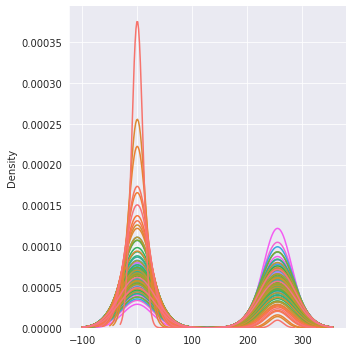

In [ ]:
sns.displot(data=arabic.iloc[:,1:].sample(100).T,kind='kde', legend=False)
plt.show()

on dirait que n’importe quel chiffre est composé de nombres supérieurs à 200 et de très petits nombres

Essayons de binariser tous les nombres en essayant différents seuils et en voyant leur efficacité.

Binariser un nombre en essayant différents seuils signifie convertir le nombre en une valeur binaire (1 ou 0) en utilisant un seuil spécifique qui est appliqué au nombre. Différents seuils peuvent être utilisés pour déterminer la valeur binaire résultante du nombre. Par exemple, un seuil de 50 pourrait être appliqué à un nombre, où tout nombre inférieur à 50 donnerait un 0 binaire, et tout nombre supérieur à 50 donnerait un 1 binaire.

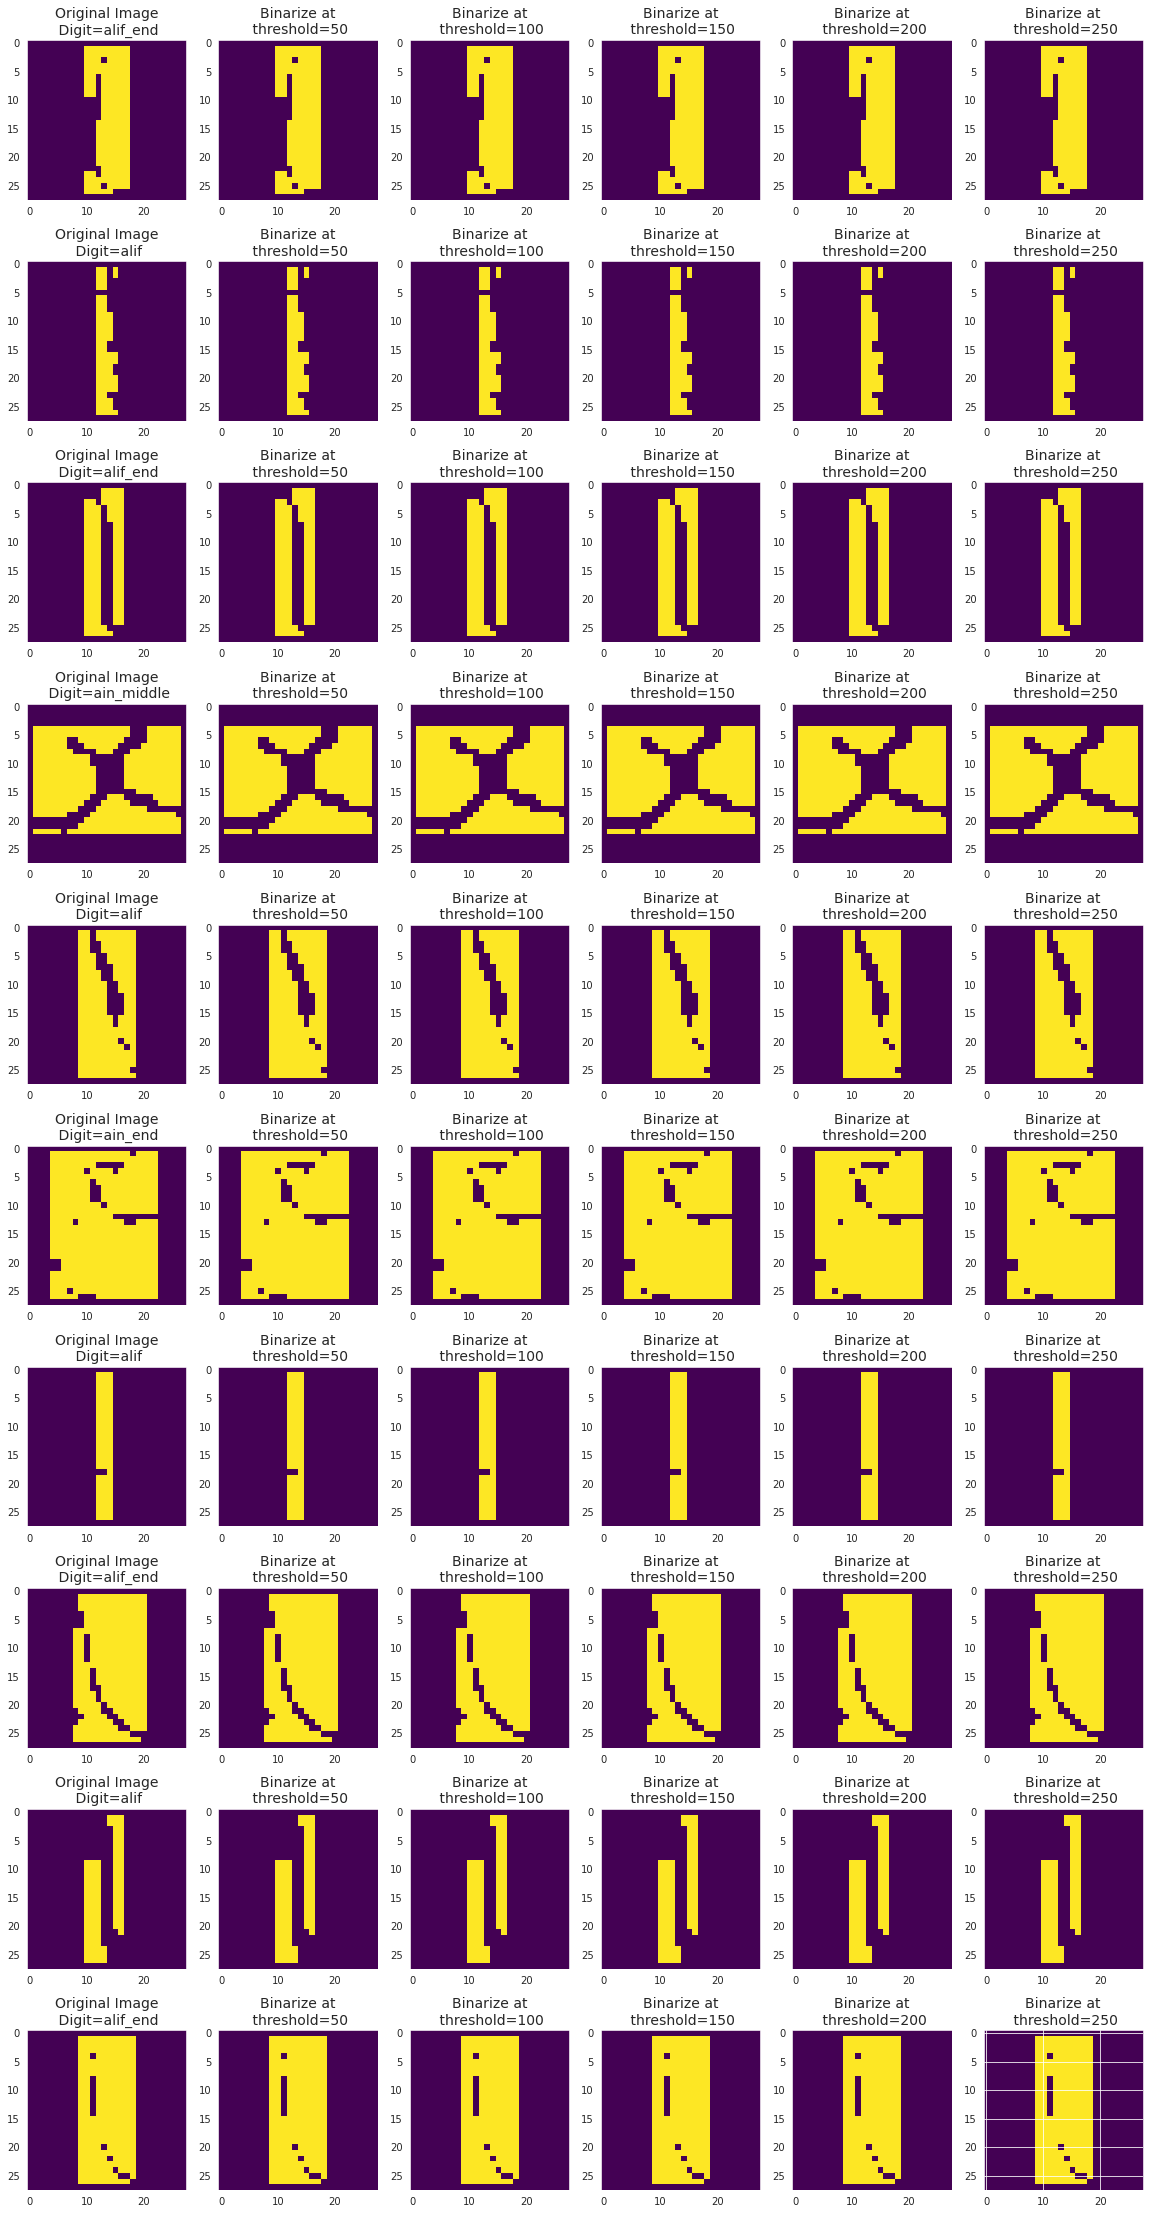

In [ ]:
fig, axes = plt.subplots(nrows=10,ncols=6, figsize=(20,40),sharey=True, sharex=True)
idx = 0
for k in np.random.choice(range(1479), 10):
    img = np.array(arabic.iloc[k,1:],dtype=float).reshape(28,28)
    idx += 1
    plt.grid(None)        
    plt.subplot(10,6,idx)
    plt.imshow(img, cmap='viridis')
    plt.title(f'Original Image\n Digit={arabic.iloc[k,0]}',fontsize=14)
    for i in range(1,6):
        idx += 1
        plt.grid(None)    
        plt.subplot(10,6,idx)
        plt.imshow(binarize(img,threshold=i*50), cmap='viridis')
        plt.title(f'Binarize at\n threshold={i*50}',fontsize=14)
plt.show()

Bon, chaque seuil a son effet sur les images. Voyons-le dans le modèle.

Travaillons avec les données originales

## Prétraitement et modélisation

In [ ]:
from sklearn.preprocessing import LabelEncoder
lett  = arabic.drop(['label'], axis=1).apply(pd.to_numeric, errors='coerce')
lett = lett.values
labels = arabic['label'].values


# split data into 90% training and 10% for test
X_train, X_test, y_train, y_test = train_test_split(lett, labels, test_size=0.1, random_state=42)

In [ ]:
digitsX = char_data.iloc[:,1:]
digitsY = char_data.label

digits_test2 = char_test.iloc[:,1:]
digits_test2


La plupart des données sont des zéros, pour une meilleure vitesse et des performances, réduisons la fonctionnalité 784 à seulement 100 en utilisant ACP

In [ ]:
pca = PCA(n_components=200).fit(X_train)
digits_X_best = pca.transform(X_train)
digits_test_best = pca.transform(X_test)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(digits_X_best, digitsY, test_size = .25, shuffle=True)
x_train.shape, x_valid.shape

((4434, 100), (1479, 100))

## Appliquons Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))
print('Accuracy score = ', round(accuracy_score(y_test, pred)*100,1),'%')

Classification Report
                  precision    recall  f1-score   support

             ain       0.00      0.00      0.00         2
         ain_end       0.00      0.00      0.00         4
      ain_middle       1.00      0.25      0.40        12
       ain_start       0.75      0.43      0.55        14
            alif       0.82      0.85      0.83        65
        alif_end       0.81      0.85      0.83        72
    alif_maqsora       0.00      0.00      0.00         2
         bae_end       0.33      0.25      0.29         4
      bae_middle       0.00      0.00      0.00         6
       bae_start       0.67      0.78      0.72        23
       dad_start       0.00      0.00      0.00         2
             dal       0.57      0.73      0.64        11
         dal_end       0.61      0.65      0.63        26
          fa_end       0.00      0.00      0.00         2
       fa_middle       0.00      0.00      0.00         4
        fa_start       0.00      0.00      0.00  

In [ ]:
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

pred=rf.predict(x_valid)
print ("Classification Report")
print(classification_report(y_valid, pred))
print ("Confusion Report")
print(confusion_matrix(y_valid, pred))
print('Accuracy score = ', round(accuracy_score(y_valid, pred)*100,1),'%')

Classification Report
                  precision    recall  f1-score   support

             ain       0.00      0.00      0.00         9
         ain_end       0.00      0.00      0.00         5
      ain_middle       0.60      0.21      0.32        14
       ain_start       0.25      0.06      0.10        17
            alif       0.89      0.86      0.87       166
        alif_end       0.58      0.91      0.71       128
    alif_maqsora       0.00      0.00      0.00         4
         bae_end       0.38      0.40      0.39        15
      bae_middle       1.00      0.11      0.20         9
       bae_start       0.44      0.60      0.51        30
       dad_start       0.00      0.00      0.00         9
             dal       0.60      0.78      0.68        23
         dal_end       0.59      0.46      0.52        41
          fa_end       0.00      0.00      0.00         5
       fa_middle       0.00      0.00      0.00         6
        fa_start       1.00      0.20      0.33  

In [ ]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [10, 50, 100, 200, 300],
               'max_depth': [None, 10, 20, 30, 40]}]

# Create the random forest model
model = RandomForestClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(grid_search.best_params_)

{'max_depth': 40, 'n_estimators': 300}


In [ ]:
# Train a model with the best hyperparameters on the full training set
model = RandomForestClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print("Test accuracy: {:.2f}".format(accuracy))

Test accuracy: 0.60


In [ ]:
testdata = pd.read_csv('testdata.csv')
testdata.shape

(3359, 1024)

In [ ]:
pca = PCA(n_components=784).fit(testdata)
test_data = pca.transform(testdata)

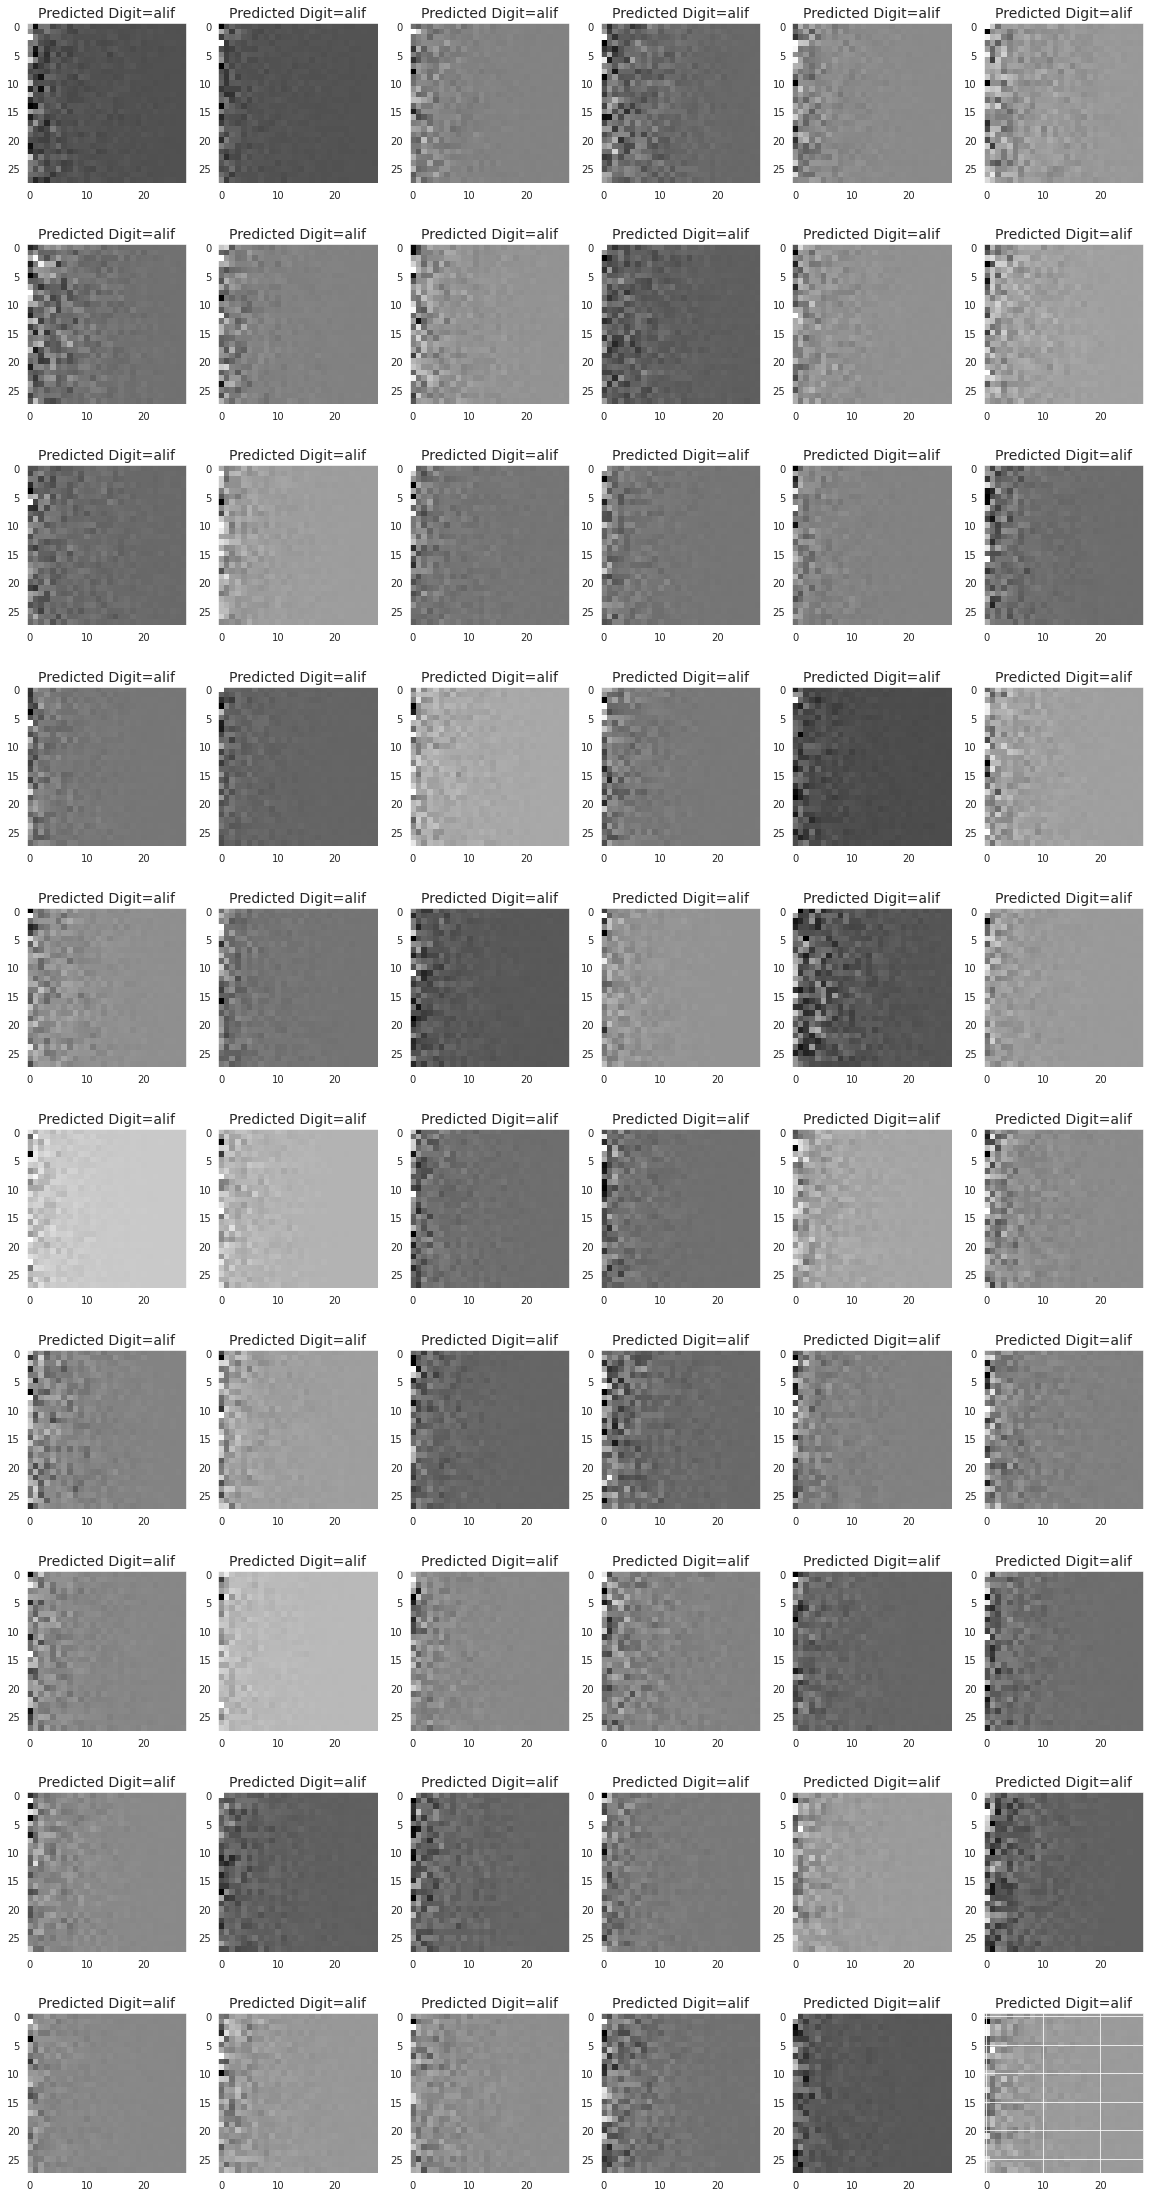

In [ ]:
rfpred = rf.predict(test_data)
fig, axes = plt.subplots(nrows=10,ncols=6, figsize=(20,40),sharey=True, sharex=True)
idx = 0
for k in np.random.choice(range(1479), 60):
    img = np.array(pd.DataFrame(test_data).iloc[k,:], dtype=float)
    idx += 1
    plt.grid(None)        
    plt.subplot(10,6,idx)
    plt.imshow(img.reshape(28,28).T,"gray")
    plt.title(f'Predicted Digit={rfpred[k]}',fontsize=14)
plt.show()

## Naive Bayes 

In [ ]:
# Import the necessary modules
from sklearn.naive_bayes import GaussianNB


# Train a Naive Bayes classifier
model = GaussianNB()
model.fit(x_train, y_train)

# Use the trained model to make predictions on the test set
predictions = model.predict(x_valid)

# Evaluate the performance of the model
accuracy = model.score(x_valid, y_valid)
print('Accuracy:', accuracy)

Accuracy: 0.43272481406355645


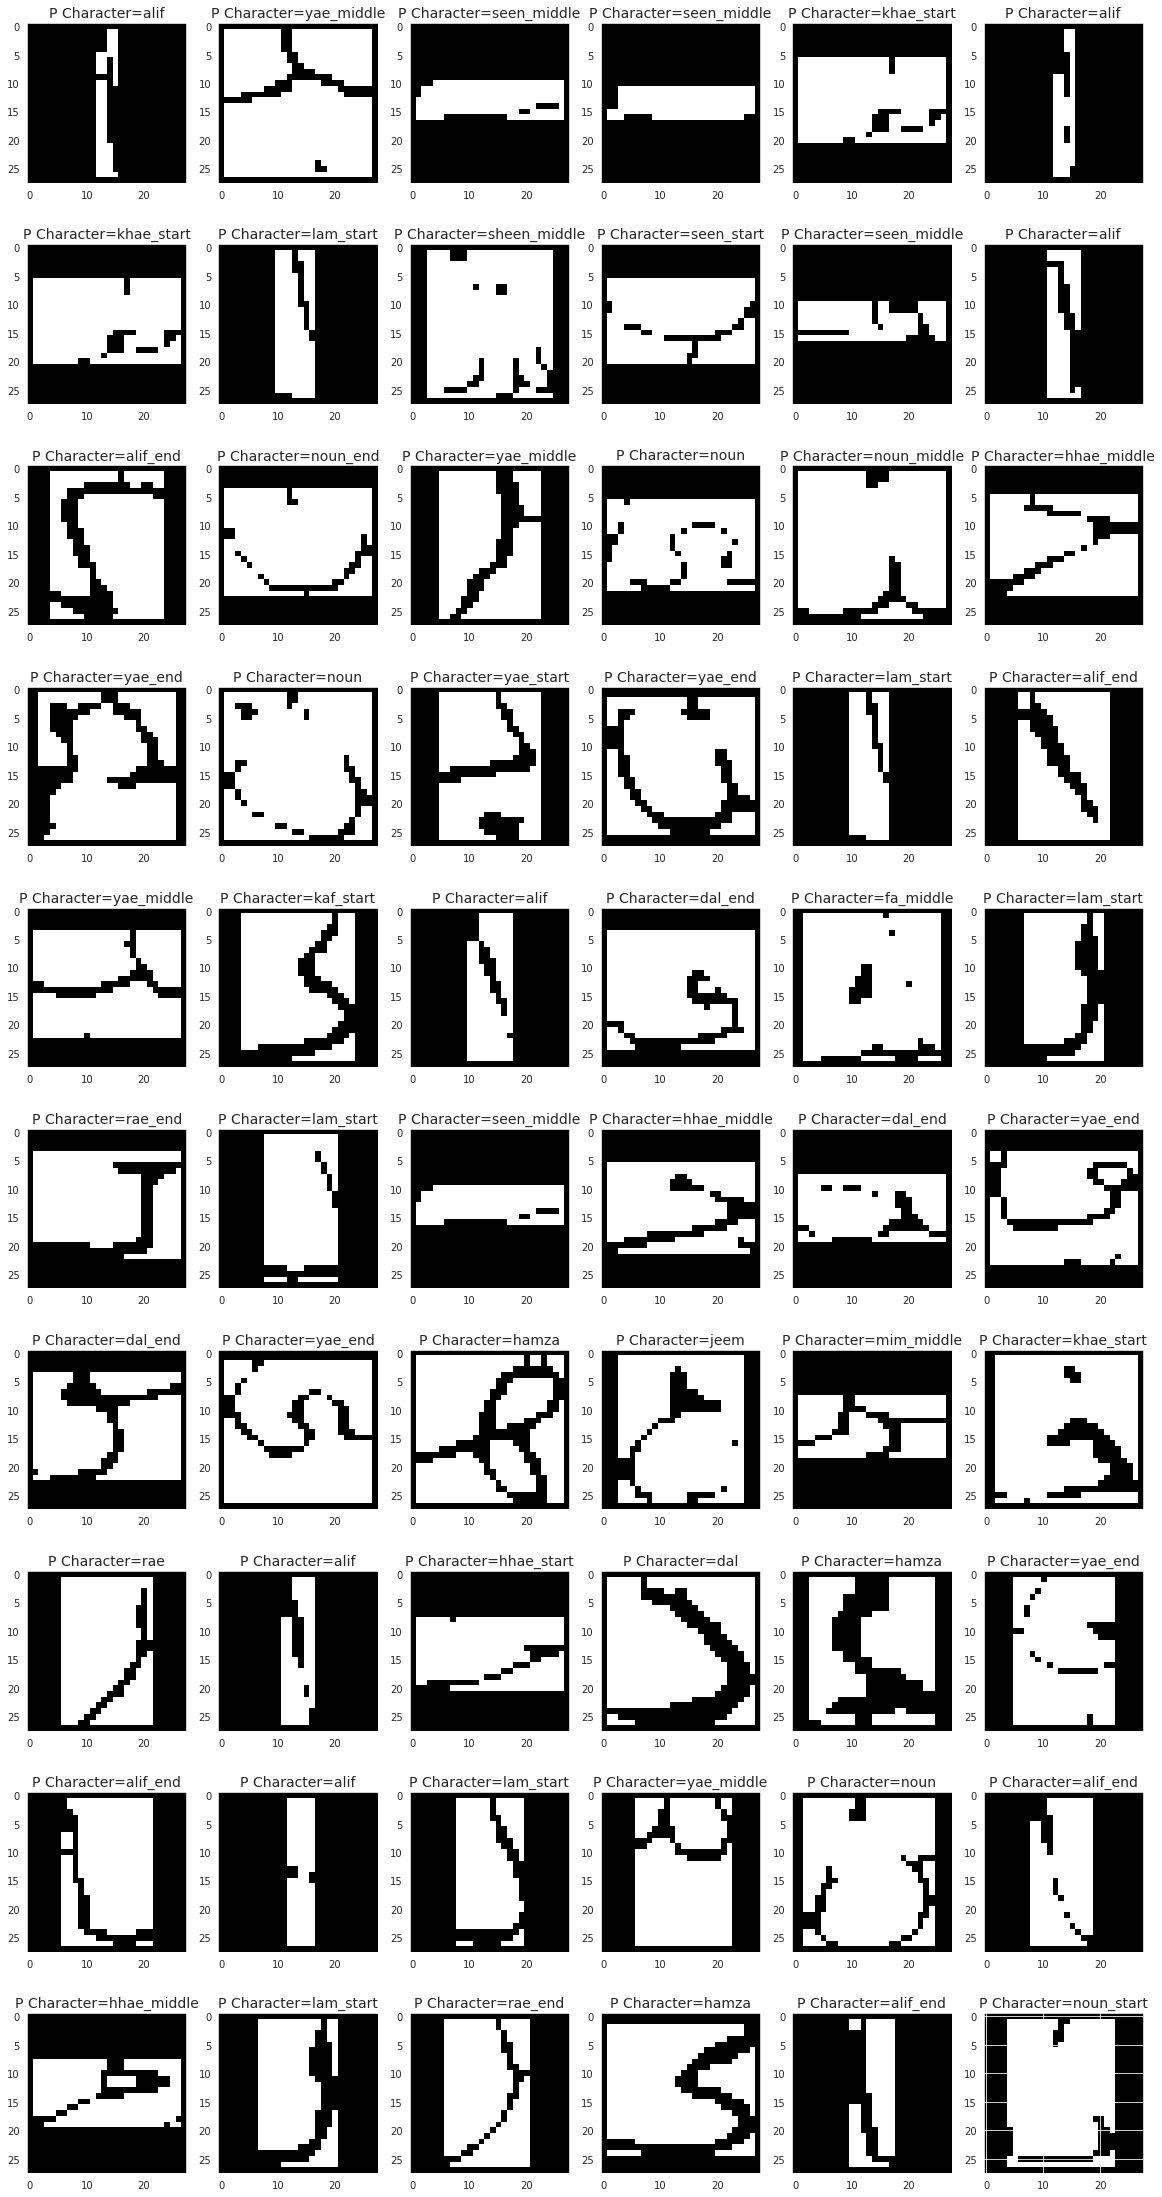

In [ ]:
nbpred = model.predict(X_test)
yy = pd.DataFrame(X_test)
fig, axes = plt.subplots(nrows=10,ncols=6, figsize=(20,40),sharey=True, sharex=True)
idx = 0
for k in np.random.choice(range(479), 60):
    img = np.array(yy.iloc[k,:]).reshape(28,28)
    idx += 1
    plt.grid(None)        
    plt.subplot(10,6,idx)
    plt.imshow(img, "gray")
    plt.title(f'P Character={nbpred[k]}',fontsize=14)
plt.show()

## appliquons SVM

In [ ]:
print('\n',f' using a 2nd degree polynomial SVC '.center(100,'='),'\n')
svc_model = SVC(kernel='poly', degree=2)
svc_model.fit(x_train, y_train)
ypred = svc_model.predict(x_valid)
print('\n',' confusion_matrix '.center(100,'-'),'\n')
print(confusion_matrix(y_valid, ypred))
print('\n',' classification_report '.center(100,'-'),'\n')
print(print(classification_report(y_valid,ypred)))
print('\n',' accuracy_score '.center(100,'-'),'\n')
print('Accuracy score = ', round(accuracy_score(y_valid,ypred)*100,1),'%')
print('-'*100)


 ================================ using a 2nd degree polynomial SVC ================================= 


 ----------------------------------------- confusion_matrix ----------------------------------------- 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 -------------------------------------- classification_report --------------------------------------- 

                  precision    recall  f1-score   support

             ain       0.00      0.00      0.00         5
         ain_end       0.00      0.00      0.00         9
      ain_middle       0.25      0.20      0.22        10
       ain_start       0.40      0.26      0.32        23
            alif       0.85      0.88      0.87       140
        alif_end       0.65      0.81      0.72       128
    alif_maqsora       0.00      0.00      0.00         3
         bae_end       0.80      0.40      0.53        10
      bae_middle       0.00      0.00     

Prédiction des données d’essai

In [ ]:
ytpred = svc_model.predict(digits_test_best)

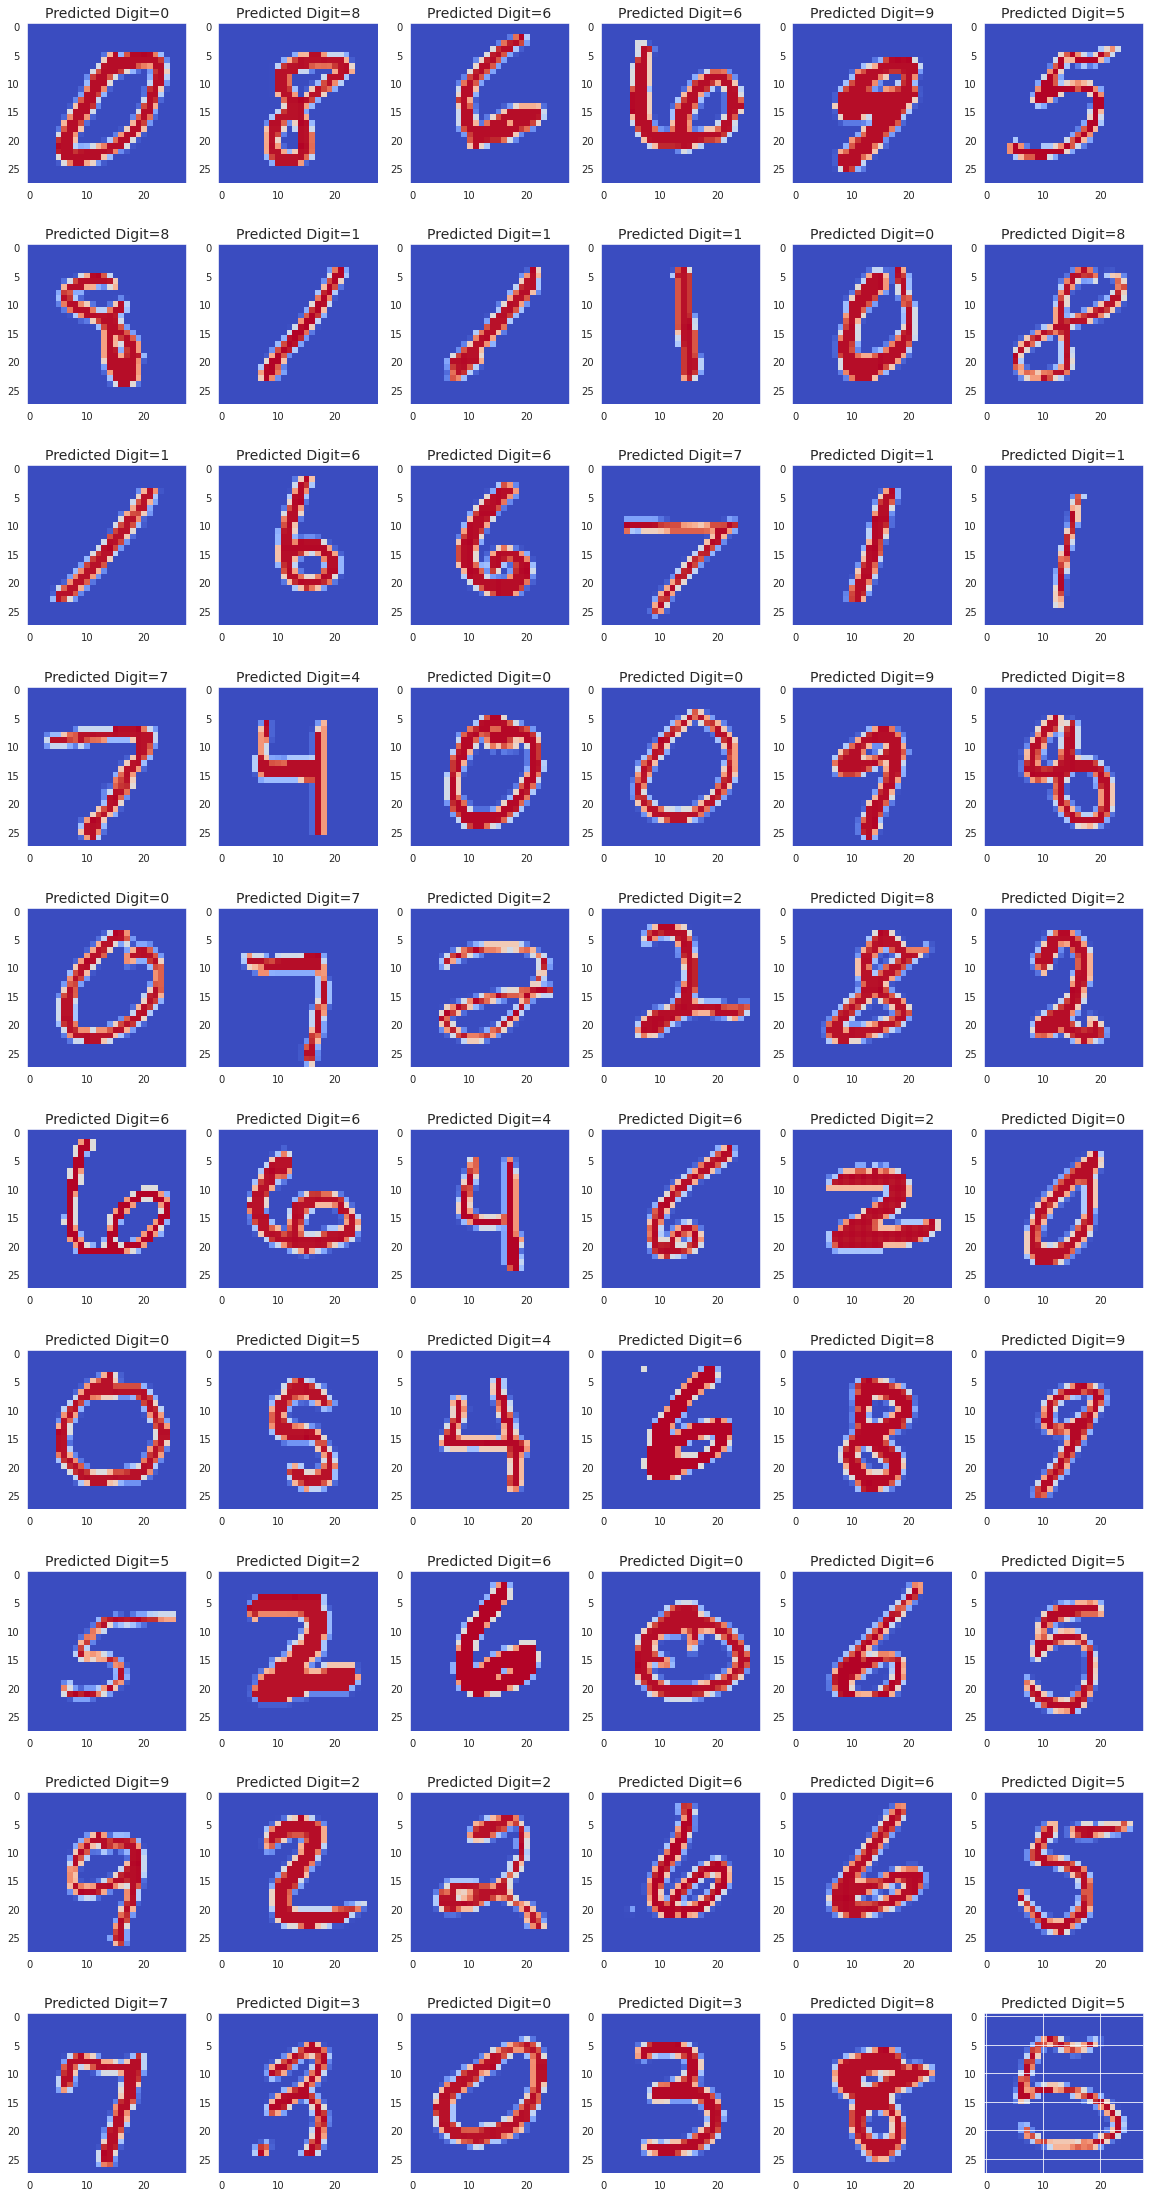

In [ ]:
fig, axes = plt.subplots(nrows=10,ncols=6, figsize=(20,40),sharey=True, sharex=True)
idx = 0
for k in np.random.choice(range(1479), 60):
    img = np.array(digits_test.iloc[k,:], ).reshape(28,28)
    idx += 1
    plt.grid(None)        
    plt.subplot(10,6,idx)
    plt.imshow(img, cmap='coolwarm')
    plt.title(f'Predicted Digit={ytpred[k]}',fontsize=14)
plt.show()

La SVM est le meilleur modèle à appliquer sur les ensembles de données MNIST car elle est très précise, robuste et efficace pour classer les points de données. La SVM est capable de traiter des données de grande dimension et de classer les données avec un haut niveau de précision. En outre, la SVM est connue pour sa capacité à traiter des données non linéaires, ce qui est particulièrement utile dans les ensembles de données MNIST, car les images sont généralement compliquées et non linéaires. Enfin, la SVM gère bien les grands ensembles de données et peut le faire en relativement peu de temps.

In [ ]:

from PIL import ImageChops,Image
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2

In [ ]:
def trim(image):
    image=Image.fromarray(image)
    bg = Image.new(image.mode, image.size, image.getpixel((0,0)))
    diff = ImageChops.difference(image, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return np.array(image.crop(bbox))
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    resized = cv2.resize(image, dim, interpolation = inter)
    return resized
def cleaned_image(image_path):
    image=cv2.imread(image_path)
    bg=np.zeros((32,32))
    image=trim(image)
    image=image_resize(image,height=28)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, image_binary = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    hh, ww = bg.shape
    h, w = image_binary.shape
    yoff = round((hh-h)/2)
    xoff = round((ww-w)/2)
    if xoff<=0:
        image=image_resize(image,height=28,width=28)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        thresh, image_binary = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        h, w = image_binary.shape
        yoff = round((hh-h)/2)
        xoff = round((ww-w)/2)
    result = bg.copy()
    result[yoff:yoff+h, xoff:xoff+w] = image_binary
    return result

In [ ]:
import os
import glob
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)
def create_dataset(input,output,name):
    for char in glob.iglob(input+'/*'):
        char_name=char.split('\\')[-1].lower()
        for type in glob.iglob(char+'/*'):
            type_name=type.split('\\')[-1].lower()
            i=0
            for image_path in glob.iglob(type+'/*'):
                create_directory(output)
                create_directory(output+'/'+char_name)
                create_directory(output+'/'+char_name+'/'+type_name)
                ext=image_path.split('\\')[-1].split('.')[1].lower()
                cv2.imwrite(output+'/'+char_name+'/'+type_name+'/'+name+'_'+str(i)+"_"+type_name+"."+ext,cleaned_image(image_path))
                i+=1


create_dataset(input='data/letters',output='letter',name='hicham_achahboun')